In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('Vessels.csv')

In [ ]:
df.head()

,Month,Vessel Traffic\n(In Nos)
0,01-01-1995,514
1,01-01-1996,507
2,01-01-1997,659
3,01-01-1998,741
4,01-01-1999,738


In [ ]:
df.tail()

,Month,Vessel Traffic\n(In Nos)
21,01-01-2016,1270
22,01-01-2017,1455
23,01-01-2018,1388
24,01-01-2019,1346
25,01-01-2020,1358


In [ ]:
df.columns=["Year","Vessels"]
df.head()

,Year,Vessels
0,01-01-1995,514
1,01-01-1996,507
2,01-01-1997,659
3,01-01-1998,741
4,01-01-1999,738


In [ ]:
df['Year']=pd.to_datetime(df['Year'])

In [ ]:
df.head()

,Year,Vessels
0,1995-01-01,514
1,1996-01-01,507
2,1997-01-01,659
3,1998-01-01,741
4,1999-01-01,738


In [ ]:
df.set_index('Year',inplace=True)
df.head()

,Vessels
Year,
1995-01-01,514
1996-01-01,507
1997-01-01,659
1998-01-01,741
1999-01-01,738


In [ ]:
df.describe()

,Vessels
count,26.000000
mean,1016.192308
std,272.099690
min,507.000000
25%,763.250000
50%,1081.000000
75%,1185.500000
max,1455.000000


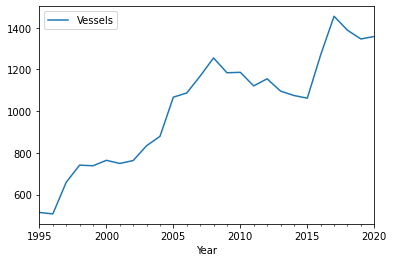

In [ ]:
df.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(Vessels):
    result=adfuller(Vessels)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Vessels'])

ADF Test Statistic : -2.710192506194919
p-value : 0.0722910663562634
#Lags Used : 9
Number of Observations Used : 16
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


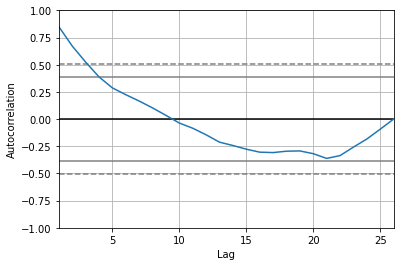

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Vessels'])
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

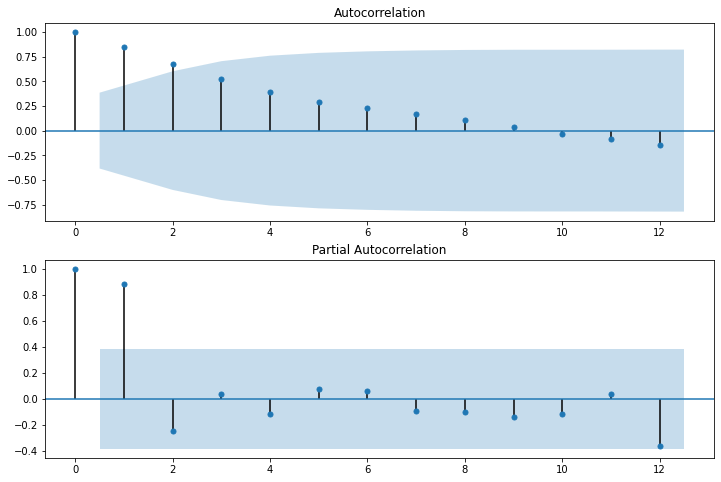

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Vessels'],lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Vessels'],lags=12,ax=ax2)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['Vessels'],order=(1,0,1))
model_fit=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                Vessels   No. Observations:                   26
Model:                     ARMA(1, 1)   Log Likelihood                -152.988
Method:                       css-mle   S.D. of innovations             82.183
Date:                Wed, 01 Feb 2023   AIC                            313.977
Time:                        12:44:13   BIC                            319.009
Sample:                    01-01-1995   HQIC                           315.426
                         - 01-01-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           974.2588    265.670      3.667      0.000     453.555    1494.963
ar.L1.Vessels     0.9490      0.059     16.065      0.000       0.833       1.065
ma.L1.Vessels     0.3101      0.195      1.586      0.113      -0.073       0.693
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0537           +0.0000j            1.0537            0.0000
MA.1           -3.2249           +0.0000j            3.2249            0.5000
-----------------------------------------------------------------------------
"""

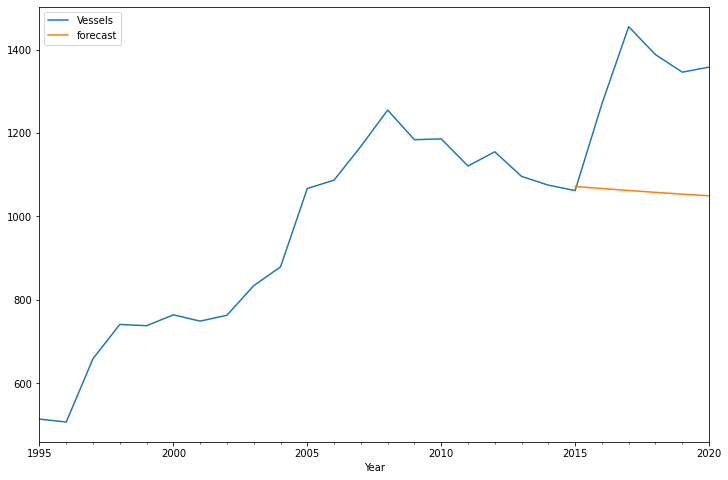

In [ ]:
df['forecast']=model_fit.predict(start=20,end=26,dynamic=True)
df[['Vessels','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Vessels'],order=(1, 0, 1),seasonal_order=(1,1,1,6))
results=model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


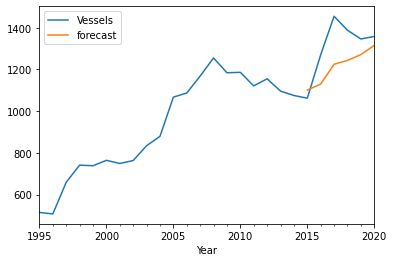

In [ ]:
df['forecast']=results.predict(start=20,end=26,dynamic=True)
df[['Vessels','forecast']].plot()

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(years=x)for x in range(0,21)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Vessels,forecast
2036-01-01,NaN,NaN
2037-01-01,NaN,NaN
2038-01-01,NaN,NaN
2039-01-01,NaN,NaN
2040-01-01,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

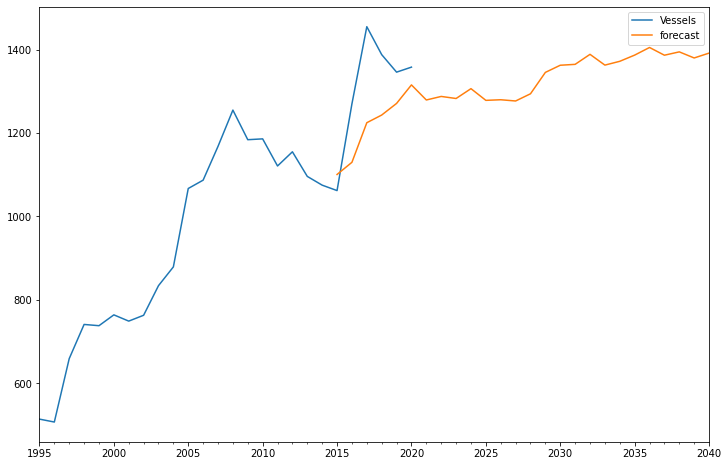

In [ ]:
future_df['forecast'] = results.predict(start = 20, end = 46, dynamic= True)  
future_df[['Vessels', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df[['Vessels', 'forecast']]

,Vessels,forecast
1995-01-01,514,NaN
1996-01-01,507,NaN
1997-01-01,659,NaN
1998-01-01,741,NaN
1999-01-01,738,NaN
2000-01-01,764,NaN
2001-01-01,749,NaN
2002-01-01,763,NaN
2003-01-01,834,NaN
2004-01-01,879,NaN
